In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

import xgboost as xgb
from xgboost import XGBRegressor, plot_importance

seed = np.random.seed(0)

In [2]:
df = pd.read_csv("BostonHousing.csv")

In [3]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.shape

(506, 14)

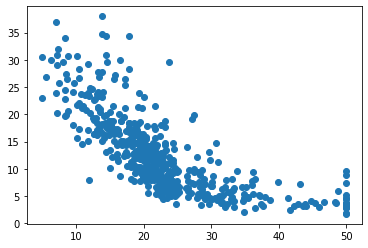

In [6]:
plt.scatter(x=df.medv,y=df.lstat)

In [7]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [9]:
xgbmodel = XGBRegressor(objective='reg:squarederror',seed=seed)

In [10]:
xgbmodel.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [11]:
ypred = xgbmodel.predict(X_test)

In [12]:
ypred

array([25.230032, 28.143232, 23.709776, 10.914078, 22.440586, 20.607834,
       21.119078, 20.775158, 24.434916, 19.040136,  7.352538, 13.035718,
       15.220244, 10.388009, 48.03965 , 34.73021 , 21.172586, 36.062294,
       27.971691, 22.456333, 23.371794, 22.138674, 20.197176, 24.863447,
       20.86113 , 20.633345, 18.206917, 16.524973, 42.33581 , 19.034252,
       16.09598 , 18.092794, 20.350416, 21.13565 , 24.209076, 18.186888,
        9.597068, 24.603432, 15.45359 , 15.018445, 23.934324, 21.059689,
       23.227365, 16.355297, 22.620886, 21.560247, 20.068186, 17.089294,
       16.045017, 23.169233, 16.947506, 19.32804 , 20.753864, 41.097347,
       15.080699, 20.035042, 19.818098, 18.425152, 15.561801, 19.58562 ,
       22.486423, 21.589027, 34.102222, 29.629549, 18.98983 , 28.6294  ,
       16.444534, 20.056686, 14.441172, 23.123306, 21.584944, 23.49504 ,
       26.501484, 30.129324, 23.887312,  9.190685, 42.536346, 22.91594 ,
       22.782911, 20.790184, 26.050293, 18.05524 , 

In [13]:
mse = mean_squared_error(y_test,ypred)
mse

21.471843729261288

In [14]:
np.sqrt(mse)

4.6337720843025165

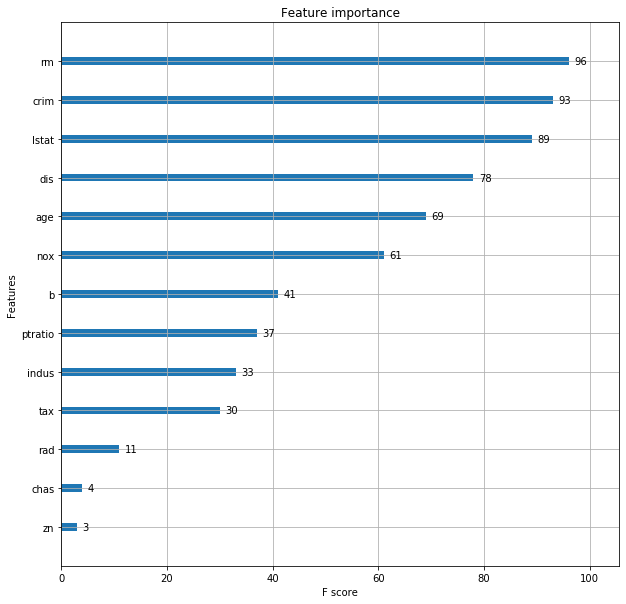

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgbmodel, ax=ax)
plt.show()

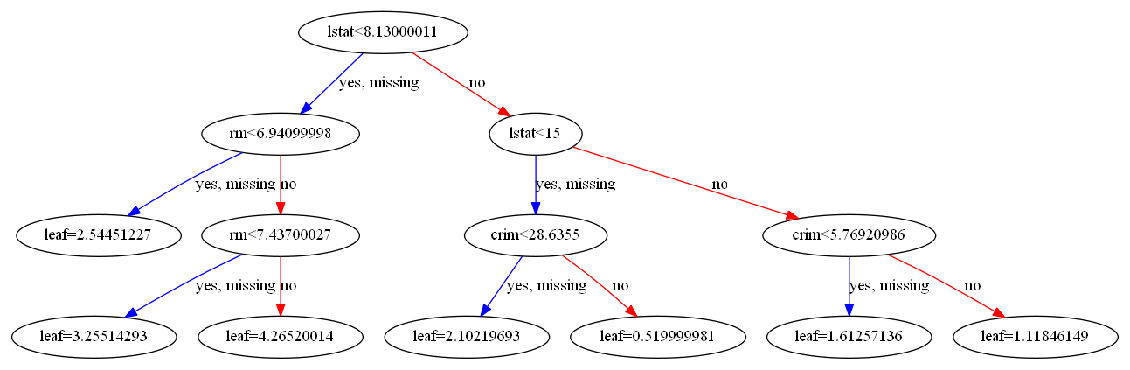

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_tree(xgbmodel, ax=ax)
plt.show()

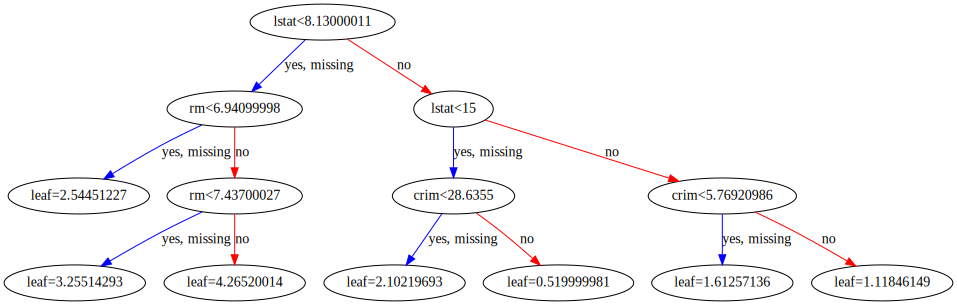

In [30]:
#fig, ax = plt.subplots(figsize=(20,10))
xgb.to_graphviz(xgbmodel)